# Business Understanding

## Background
My company is looking to get into movie creation using their newly created movie studio. 

## Business Goals
The primary focus of this data science project is to analyze and assess features that contribute to a movie's return on investment in order to make an informed decision regarding what features of movie creation my company should invest in.

## Business Success Criteria
The success of this project will be measured by providing three well-supported recommendations on the most cost efficient movie features (actors, directots, genre, marketing cost, movie rating (G, PG, PG-13, etc.)) to invest in. For this project, the most "cost efficient" features are measured by their return on investment which is defined as 100% times the total revenue divided by the initial investment of the feature.

# Data Understanding

Data on movies is collected by a variety of different sources. For this project, I used data from the following sources:
- Box Office Mojo's "Movie Gross" dataset
    - This dataset includes 5 features and 3387 observations. Each entry in the dataset represents a different movie title. Additional information is included about each entry, such as the production studio, the domestic gross box office, the foreign gross box office, and the release year.
    
    
- Rotten Tomatoes "Movie Info" dataset
    - This dataset includes 12 features and 1560 observations/entries where each entry in the dataset represents a different movie. Even though the movie title is not included, each entry has an associated unique ID. Additional information is included about each entry, such as a synopsis, the movie rating, genre(s), director, writer, and runtime.
    
    
- Rotten Tomatoes "Movie Reviews" dataset
    - This dataset includes 8 features and 54432 observations/entries, where each entry in the dataset represents a different review left by a movie critic. Each entry contains an ID which refers to the movie the review is about. In addition to the review, other information for each entry includes a rating (out of 5), the critic's name, the publisher, and the date the review was left. 


- The Movie DB's "Movies" dataset
    - This dataset includes 10 features and 26517 observations. Each entry in the dataset represents a different movie. For each entry information is included about the movie's genre, original language, popularity score, and number of votes. 
    
    
- The Numbers' "movie_budgets" dataset
    - This dataset includes 6 features and 5782 observations. Each entry in the dataset represents a different movie. For each entry, information is included about the movie's release data, production budget, domestic gross box office, and worldwide gross box office.
    
    
- IMDB's film database
    - This database includes 8 tables. Its entity-related diagram (ERD) is shown below.  

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [2]:
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
# defining columns to format

budget_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']


In [5]:
# formatting budget columns by removing the $

for col in budget_cols:
     budgets[col] = budgets[col].str.replace('$', '')
        
        
# formatting budget columns by removing commas

for col in budget_cols:
     budgets[col] = budgets[col].str.replace(',', '')

In [6]:
# changing dtype of budget and gross columns to int

for col in budget_cols:
     budgets[col] = budgets[col].astype(float)

In [7]:
#converting dollar amounts to amounts that are easier to read

for col in budget_cols:
    budgets[col] = round(budgets[col]/1000000, 3)

In [8]:
# renaming columns to include dollar sign
budgets.rename(columns={'production_budget': 'production_budget (millions of $)', 'domestic_gross': 'domestic_gross (millions of $)', 'worldwide_gross' : 'worldwide_gross (millions of $)'}, inplace=True)


In [9]:
budgets.head()

,id,release_date,movie,production_budget (millions of $),domestic_gross (millions of $),worldwide_gross (millions of $)
0,1,"Dec 18, 2009",Avatar,425.0,760.508,2776.345
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.064,1045.664
2,3,"Jun 7, 2019",Dark Phoenix,350.0,42.762,149.762
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.006,1403.014
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,620.181,1316.722


In [10]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 5782 non-null   int64  
 1   release_date                       5782 non-null   object 
 2   movie                              5782 non-null   object 
 3   production_budget (millions of $)  5782 non-null   float64
 4   domestic_gross (millions of $)     5782 non-null   float64
 5   worldwide_gross (millions of $)    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [11]:
budgets['roi (%)'] = round(((budgets['domestic_gross (millions of $)'] + budgets['worldwide_gross (millions of $)'] - budgets['production_budget (millions of $)'])/ 
                budgets['production_budget (millions of $)']) * 100, 2)



In [12]:
budgets.head()

,id,release_date,movie,production_budget (millions of $),domestic_gross (millions of $),worldwide_gross (millions of $),roi (%)
0,1,"Dec 18, 2009",Avatar,425.0,760.508,2776.345,732.20
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.064,1045.664,213.38
2,3,"Jun 7, 2019",Dark Phoenix,350.0,42.762,149.762,-44.99
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.006,1403.014,463.22
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,620.181,1316.722,511.01


In [13]:
budgets.movie.value_counts()

Halloween                3
King Kong                3
Home                     3
Unknown                  2
Notorious                2
                        ..
Crank 2: High Voltage    1
Pathology                1
Some Like it Hot         1
It                       1
JÃ¬yÃ¬ dÃ shÄ«           1
Name: movie, Length: 5698, dtype: int64

In [14]:
multiple_values = budgets.movie.value_counts()
budgets[budgets.movie.isin(multiple_values.index[multiple_values.gt(1)])]

,id,release_date,movie,production_budget (millions of $),domestic_gross (millions of $),worldwide_gross (millions of $),roi (%)
26,27,"May 4, 2012",The Avengers,225.000,623.280,1517.936,851.65
38,39,"May 14, 2010",Robin Hood,210.000,105.487,322.459,103.78
39,40,"Dec 14, 2005",King Kong,207.000,218.080,550.517,271.30
50,51,"Mar 5, 2010",Alice in Wonderland,200.000,334.191,1025.491,579.84
64,65,"Jun 9, 2017",The Mummy,195.000,80.101,409.954,151.31
...,...,...,...,...,...,...,...
5668,69,"Nov 16, 1942",Cat People,0.134,4.000,8.000,8855.22
5676,77,"Oct 1, 1968",Night of the Living Dead,0.114,12.087,30.087,36894.74
5677,78,"Feb 8, 1915",The Birth of a Nation,0.110,10.000,11.000,18990.91
5699,100,"Aug 30, 1972",The Last House on the Left,0.087,3.100,3.100,7026.44


In [23]:
budgets['roi (%)'].mean()

678.944737115185

In [24]:
budgets['roi (%)'].median()

165.945

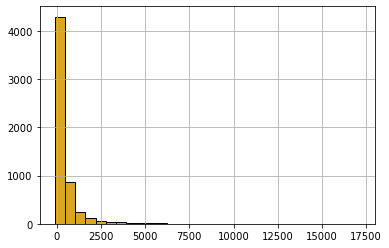

In [32]:
# plotting roi histogram without outliers
mean = budgets['roi (%)'].mean()
stan_dev = budgets['roi (%)'].std()

outliers_threshold = 3 * stan_dev

hist_no_outliers = budgets[(budgets['roi (%)'] > (mean - outliers_threshold)) & (budgets['roi (%)'] < (mean + outliers_threshold))]

hist_no_outliers['roi (%)'].hist(bins=30, color='goldenrod', edgecolor='black');

In [22]:
budgets[budgets['roi (%)'] > 50].sort_values(by = ['roi (%)'], ascending = True)

,id,release_date,movie,production_budget (millions of $),domestic_gross (millions of $),worldwide_gross (millions of $),roi (%)
1763,64,"Aug 3, 2018",The Darkest Minds,34.000,12.696,38.361,50.17
5444,45,"Aug 23, 2013",Drinking Buddies,0.500,0.344,0.407,50.20
4726,27,"Apr 4, 2003",DysFunkTional Family,3.000,2.255,2.255,50.33
346,47,"Nov 23, 2016",Allied,106.000,40.098,119.267,50.34
3732,33,"Dec 31, 2010",The Reef,10.000,0.000,15.038,50.38
...,...,...,...,...,...,...,...
5773,74,"Feb 26, 1993",El Mariachi,0.007,2.041,2.042,58228.57
5679,80,"Jul 10, 2015",The Gallows,0.100,22.764,41.656,64320.00
5406,7,"Jul 14, 1999",The Blair Witch Project,0.600,140.539,248.300,64706.50
5492,93,"Sep 25, 2009",Paranormal Activity,0.450,107.919,194.183,67033.78


In [40]:
# defining names of movies with highest roi
top_4000_roi = budgets.sort_values(by = ['roi (%)'], ascending = True).head(4000)['movie']

In [34]:
budgets[budgets['roi (%)'] > 10]['movie']

0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
5              Star Wars Ep. VII: The Force Awakens
                           ...                     
5773                                    El Mariachi
5774                                         Primer
5775                                         Cavite
5778                                      Following
5781                              My Date With Drew
Name: movie, Length: 4096, dtype: object

In [16]:
budgets.to_csv('budgets_roi.csv', index=False) 

In [45]:
#setting up connection to database

conn = sqlite3.connect('im.db')
cur = conn.cursor()

In [46]:
db_tables = pd.read_sql("""

SELECT name
FROM sqlite_master
WHERE type = 'table';

""", conn)

db_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [47]:
movie_basics = pd.read_sql("""

SELECT * 
FROM movie_basics

""", conn)

movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [48]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [62]:
movie_basics[movie_basics['primary_title'].isin(top_4000_roi)]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
20,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy"
48,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance"
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama"
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama"
62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama"
...,...,...,...,...,...,...
145843,tt9877596,Trapped,Trapped,2016,NaN,None
145937,tt9889072,The Promise,The Promise,2017,NaN,Drama
145986,tt9893078,Sublime,Sublime,2019,NaN,Documentary
146025,tt9899880,Columbus,Columbus,2018,85.0,Comedy


In [63]:
movie_basics[movie_basics['original_title'].isin(top_4000_roi)]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
20,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy"
48,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance"
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama"
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama"
62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama"
...,...,...,...,...,...,...
145843,tt9877596,Trapped,Trapped,2016,NaN,None
145937,tt9889072,The Promise,The Promise,2017,NaN,Drama
145986,tt9893078,Sublime,Sublime,2019,NaN,Documentary
146025,tt9899880,Columbus,Columbus,2018,85.0,Comedy


In [49]:
directors = pd.read_sql("""

SELECT *
FROM directors

""", conn)

directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [50]:
movie_ratings = pd.read_sql("""

SELECT *
FROM movie_ratings
""", conn)

In [51]:
persons = pd.read_sql("""

SELECT *
FROM persons
""", conn)

persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [52]:
writers = pd.read_sql("""

SELECT *
FROM writers
""", conn)

writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [53]:
#movie_db_info = pd.read_sql("""

#SELECT  DISTINCT movie_id, primary_title, original_title, start_year, runtime_minutes, averagerating, numvotes, primary_name, primary_profession, genres
#FROM movie_basics
#JOIN movie_ratings
 #   USING(movie_id)
#JOIN directors
 #   USING(movie_id)
#JOIN persons
 #   USING(person_id)

#""", conn)

#movie_db_info.info()

In [54]:
#movie_db_info.head()

In [55]:
#movie_db_info.original_title.value_counts()

In [56]:
#multiple_values_db = movie_db_info.primary_title.value_counts()
#movie_db_info[movie_db_info.primary_title.isin(multiple_values_db.index[multiple_values_db.gt(10)])]

In [57]:
#movie_db_info.primary_title.value_counts()

In [ ]:
#movie_db_info.isna().sum()

In [ ]:
#round(movie_db_info.isnull().mean()*100,2) 

In [ ]:
#import seaborn as sns
#sns.histplot(movie_db_info['runtime_minutes']);

In [ ]:
# Trying to merge budget df with database df
# pd.merge(movie_db_info, budgets, left_on='primary_title', right_on='movie', how='inner')

# Exploratory Data Analysis

# Conclusion
 
## Limitations

## Recommendations

## Next Steps

# Resources

- got error when trying to read in reviews.tsv dataset: "UnicodeDecodeError: 'utf8' codec can't decode byte 0xa5 in position 0: invalid start byte". This resource helped: https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s

- Had trouble reading zipped data with pandas. This helped me with reading in the csv and tsv data: https://stackoverflow.com/questions/18885175/read-a-zipped-file-as-a-pandas-dataframe

- for joining datasets: https://stackoverflow.com/questions/53645882/pandas-merging-101

- the movie_info dataset had the word 'minutes' in each entry for runtime. Just wanted the numbers. this was helpful:
https://saturncloud.io/blog/how-to-remove-characters-from-a-pandas-column-a-data-scientists-guide/

- merging on more than one condition: https://stackoverflow.com/questions/53549492/joining-two-pandas-dataframes-based-on-multiple-conditions

- dropping nulls in certain columns: https://saturncloud.io/blog/how-to-delete-rows-with-null-values-in-a-specific-column-in-pandas-dataframe/#:~:text=Deleting%20rows%20with%20null%20values%20in%20a%20specific%20column%20can,values%20in%20the%20specified%20column.&text=df%20is%20the%20Pandas%20DataFrame%20that%20you%20want%20to%20modify.

- for subsetting dataframe to only show entries with value count more than one https://stackoverflow.com/questions/48628417/how-to-select-rows-in-pandas-dataframe-where-value-appears-more-than-once

- Finding rows with matching entries: https://stackoverflow.com/questions/22485375/efficiently-select-rows-that-match-one-of-several-values-in-pandas-dataframe